# 2025 Pocono Monte Carlo Simulation

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from PIL import Image

In [25]:
cup_roster = pd.read_csv("C:/Users/jakel/OneDrive/Desktop/GitHub/NASCAR-Race-Predictions/Master-Data/2025-cup-series-full-timers.txt")

In [26]:
simulation_data = pd.read_csv("C:/Users/jakel/OneDrive/Desktop/GitHub/NASCAR-Race-Predictions/Pocono-Driver-Data/pocono-sim-ready-data.csv")
simulation_data.head()

,Unnamed: 0,Driver,Avg Finish,Races,Wins,Top 5's,Top 10's,Laps Led,DNF,Avg Rating,DNF_Prob,Laps Led Per Race,Std Dev
0,0,William Byron,9.4,11,0,3,6,130,0,96.7,0.030000,11.818182,2.5
1,1,Brad Keselowski,10.8,27,1,11,16,247,1,94.4,0.037037,9.148148,2.5
2,2,Denny Hamlin,11.3,35,7,16,23,858,3,108.7,0.085714,24.514286,2.5
3,3,Kyle Larson,11.6,17,0,5,9,158,0,95.8,0.030000,9.294118,2.5
4,5,Ryan Blaney,13.4,15,2,3,7,95,1,89.6,0.066667,6.333333,3.5


In [27]:
def simulate_race(df):
    finish_positions = []
    
    for _, row in df.iterrows():
        # quick check for a DNF
        dnf = np.random.rand() < row['DNF_Prob']
        
        if dnf:
            # DNF finish at the back of the pack
            finish_pos = np.random.randint(len(df) + 1, len(df) + 6)
        else:
            # Finished race: sample finish from a normal distribution centered at Avg Finish
            # use the std dev calculated from avg finish to control variability
            finish_pos = np.random.normal(loc=row['Avg Finish'], scale=row['Std Dev'])
            
            # bound finish position between 1 and number of drivers so we get nothing crazy
            finish_pos = max(1, min(len(df), finish_pos))
        
        finish_positions.append((row['Driver'], finish_pos, dnf))
    
    # convert the list to a dataframe to sort and view easier
    results = pd.DataFrame(finish_positions, columns=['Driver', 'Finish_Pos', 'DNF'])
    
    # sort by DNF first (non-DNF comes first), then finish position
    results = results.sort_values(by=['DNF', 'Finish_Pos'], ascending=[True, True]).reset_index(drop=True)
    
    # driver in position 0 is the winner of that simulation
    winner = results.iloc[0]['Driver']
    return winner

def run_simulations(df, num_simulations=10000):
    win_counts = {driver: 0 for driver in df['Driver']}
    
    for i in range(num_simulations):
        winner = simulate_race(df)
        win_counts[winner] += 1
    
    # convert the list to a dataframe to sort and view easier
    win_probs = pd.DataFrame(list(win_counts.items()), columns=['Driver', 'Wins'])
    win_probs['Win_Prob'] = win_probs['Wins'] / num_simulations
    win_probs = win_probs.sort_values(by='Win_Prob', ascending=False).reset_index(drop=True)
    return win_probs


In [28]:
# run the simulation
results = run_simulations(simulation_data)
print(results)

                  Driver  Wins  Win_Prob
0          William Byron  3363    0.3363
1        Brad Keselowski  1485    0.1485
2           Denny Hamlin  1038    0.1038
3            Kyle Larson   912    0.0912
4          Chase Elliott   617    0.0617
5          Tyler Reddick   617    0.0617
6            Ryan Blaney   597    0.0597
7             Erik Jones   585    0.0585
8             Kyle Busch   110    0.0110
9       Christopher Bell    93    0.0093
10              Ty Gibbs    82    0.0082
11         Daniel Suarez    78    0.0078
12           Alex Bowman    64    0.0064
13         Bubba Wallace    59    0.0059
14         Austin Dillon    59    0.0059
15        Carson Hocevar    52    0.0052
16           Joey Logano    48    0.0048
17        Chris Buescher    47    0.0047
18            Josh Berry    39    0.0039
19         Chase Briscoe    26    0.0026
20   Ricky Stenhouse Jr.    12    0.0012
21             Ty Dillon     8    0.0008
22     A.J. Allmendinger     5    0.0005
23        Todd G

C:\Users\jakel\AppData\Local\Temp\ipykernel_4148\1306530603.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Win_Prob', y='Driver', palette='viridis')


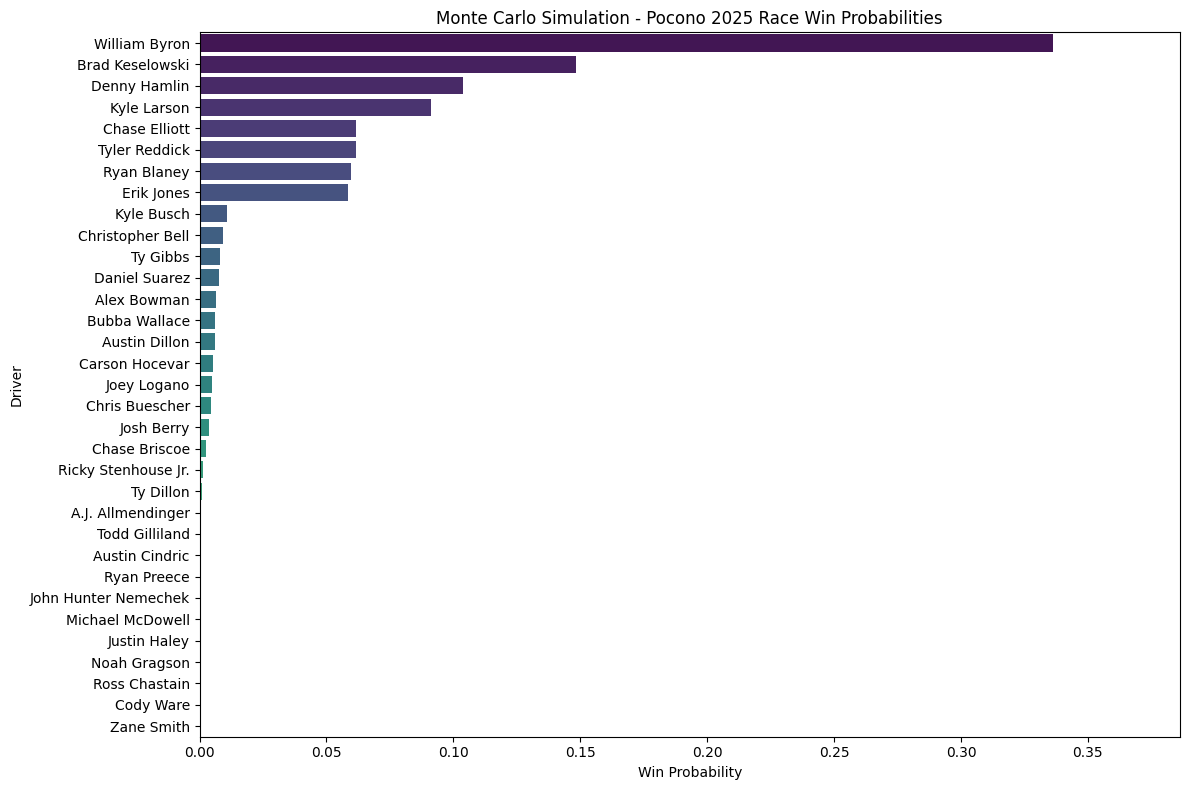

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(data=results, x='Win_Prob', y='Driver', palette='viridis')

plt.xlabel('Win Probability')
plt.ylabel('Driver')
plt.title('Monte Carlo Simulation - Pocono 2025 Race Win Probabilities')
plt.xlim(0, results['Win_Prob'].max() + 0.05)

plt.tight_layout()
plt.show()

In [39]:
results_with_nums = results.merge(cup_roster[['Driver', 'Car No.']], on='Driver', how='left')
top_10 = results_with_nums.sort_values(by='Win_Prob', ascending=False).head(10).reset_index(drop=True)
top_10

,Driver,Wins,Win_Prob,Car No.
0,William Byron,3363,0.3363,24
1,Brad Keselowski,1485,0.1485,6
2,Denny Hamlin,1038,0.1038,11
3,Kyle Larson,912,0.0912,5
4,Chase Elliott,617,0.0617,9
5,Tyler Reddick,617,0.0617,45
6,Ryan Blaney,597,0.0597,12
7,Erik Jones,585,0.0585,43
8,Kyle Busch,110,0.0110,8
9,Christopher Bell,93,0.0093,20
